In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import warnings

### Business Problem 1
Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

In [3]:
loans=pd.read_csv('C:/Users/avnis/Case study/Case study 4 Hypothesis testing/LoansData.csv')

In [4]:
loans.columns=loans.columns.str.replace('.','_')

<ipython-input-4-47a03d7d57d7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  loans.columns=loans.columns.str.replace('.','_')


In [5]:
loans['Interest_Rate']=pd.to_numeric(loans.Interest_Rate.str.replace('%',''))

In [6]:
loans['Debt_To_Income_Ratio']=pd.to_numeric(loans.Debt_To_Income_Ratio.str.replace('%',''),downcast='float')

In [7]:
loans.dropna(inplace=True)

#### a. Intrest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [8]:
# We use Correlation - Pearson's Cofficient to check for relationship between Interest rate 
# and loan amounts

# H0 - No relationship
# Ha - Relationship exists
# 
# CI - 95%, p - 0.05

# perform the test
print(stats.pearsonr(loans.Interest_Rate,loans.Amount_Requested ))

# based on p values, p value of the test is very small compared to cutoff p at 95%; 
# thus we will reject the H0



(0.32655834784684623, 4.54550850928288e-61)


#### Business conclusion:
 There is weak positive correlation between the Interest Rate and Loan Amount,
 claim is made at the CI of 95%

C:\Users\avnis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


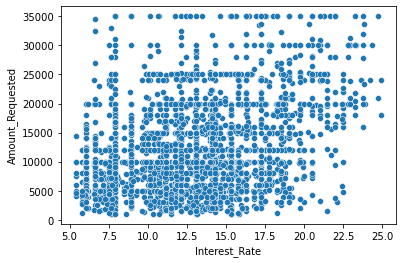

In [9]:
sns.scatterplot(loans.Interest_Rate,loans.Amount_Requested )
plt.show()

#### b. Loan length is directly effecting interest rate.


In [10]:
loans.Loan_Length.unique()

array(['36 months', '60 months'], dtype=object)

In [11]:
period_36=loans[loans.Loan_Length=='36 months']['Interest_Rate']
period_60=loans[loans.Loan_Length=='60 months']['Interest_Rate']

In [12]:
# We use Independent t-test for checking out effect of loan length on interest rate

# Ho: period_36=period_60
# Ha: period_36<>period_60

# CI = 95%, p = 0.05

#performing the 2 sample independent test:
print( stats.ttest_ind(period_36 , period_60 ))

# based on low p values, p value of the test is low compared to cutoff p at 95%; 
# thus we will reject the null hypothesis Ho


Ttest_indResult(statistic=-23.05779328482699, pvalue=1.79380106734165e-106)


#### Business Conclusion:
Since the significance value of the test is less than 0.05, we can safely conclude that there is no similarity for interest rate between various loan length

#### c. Interest rate varies for different purpose of loans


In [13]:
loans.Loan_Purpose.unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [14]:
s1=loans.loc[loans.Loan_Purpose=='debt_consolidation','Interest_Rate']
s2=loans.loc[loans.Loan_Purpose=='credit_card','Interest_Rate']
s3=loans.loc[loans.Loan_Purpose=='other','Interest_Rate']
s4=loans.loc[loans.Loan_Purpose=='moving','Interest_Rate']
s5=loans.loc[loans.Loan_Purpose=='car','Interest_Rate']
s6=loans.loc[loans.Loan_Purpose=='vacation','Interest_Rate']
s7=loans.loc[loans.Loan_Purpose=='home_improvement','Interest_Rate']
s8=loans.loc[loans.Loan_Purpose=='house','Interest_Rate']
s9=loans.loc[loans.Loan_Purpose=='major_purchase','Interest_Rate']
s10=loans.loc[loans.Loan_Purpose=='educational','Interest_Rate']
s11=loans.loc[loans.Loan_Purpose=='medical','Interest_Rate']
s12=loans.loc[loans.Loan_Purpose=='wedding','Interest_Rate']
s13=loans.loc[loans.Loan_Purpose=='small_business','Interest_Rate']
s14=loans.loc[loans.Loan_Purpose=='renewable_energy','Interest_Rate']

In [15]:
# We need to perform f-test/Anova test to check various interest rate 
# across various loan purpose 

# H0: means are same; or samples are from same population
# Ha: means are not same
# CI = 95%, p = 0.05

print( stats.f_oneway(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14) )

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0


F_onewayResult(statistic=7.330838185919651, pvalue=2.7646672581411367e-14)


#### Business Conclusion
Different Loan Purpose have different Interest Rate , claim is made at the CI of 95%

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


In [16]:
# for checking the relationship between Fico Scores and Home Ownership categories we need to perform
# a chi square test

# H0 - No relationship
# Ha - Relationship exists
# Taking:
# CI - 95%, p - 0.05
 
# create a obs freq table | cross table
cross=pd.crosstab(loans.Home_Ownership,loans.FICO_Range)
    
    # perform the test
print(stats.chi2_contingency( observed = cross ))

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

(269.7881202757334, 3.0875472813837764e-15, 111, array([[2.29796933e+00, 1.37878160e+00, 4.59593867e-01, 1.83837547e+00,
        5.42320763e+01, 6.34239536e+01, 7.67521757e+01, 7.39946125e+01,
        7.21562370e+01, 5.88280149e+01, 6.20451720e+01, 6.71007045e+01,
        5.69896395e+01, 6.02067965e+01, 4.91765437e+01, 4.22826357e+01,
        4.96361376e+01, 4.18230419e+01, 4.32018235e+01, 2.98736013e+01,
        2.29796933e+01, 2.48180688e+01, 2.75756320e+01, 2.02221301e+01,
        2.06817240e+01, 1.47070037e+01, 7.81309573e+00, 1.01110651e+01,
        1.19494405e+01, 7.81309573e+00, 9.19187733e+00, 5.97472027e+00,
        5.51512640e+00, 5.05553253e+00, 3.67675093e+00, 2.29796933e+00,
        4.59593867e-01, 4.59593867e-01],
       [1.03605470e-02, 6.21632822e-03, 2.07210941e-03, 8.28843763e-03,
        2.44508910e-01, 2.85951098e-01, 3.46042271e-01, 3.33609615e-01,
        3.25321177e-01, 2.65230004e-01, 2.79734770e-01, 3.02527973e-01,
        2.56941567e-01, 2.71446332e-01, 2.2171

### Business conclusion:
There is a relationship between various Fico Scores and the Home Ownership category, claim is made at the CI of 95%

### Business Problem 2


#### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.


In [17]:
price_quotes=pd.read_csv('C:/Users/avnis/Case study/Case study 4 Hypothesis testing/Price_Quotes.csv')

In [18]:
#For checking out variation between prices quoted by two people we will perform a 
# Independent 2 sample t test

print('Average price quoted by Mary is:',price_quotes.Mary_Price.mean())
print('Average price quoted by Barry is:',price_quotes.Barry_Price.mean())

# Ho: Average_Mary=Average_Barry
# Ha: Average_Mary<>Average_Barry

# CI = 95%, p = 0.05

#performing the 2 sample t test:
print( stats.ttest_ind( price_quotes.Mary_Price, price_quotes.Barry_Price ) )


# based on p values, p value of the test is higher compared to cutoff p at 95%; 
# thus we will fail to reject the null hypothesis Ho


Average price quoted by Mary is: 114.75
Average price quoted by Barry is: 124.33333333333333
Ttest_indResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285)


#### Business Conclusion:
Since the significance value of the test is greater than 0.05, we can safely conclude that there is a similarity between amount claimed by two experts Mary and Barry

### Business Problem 3
BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Isthere evidence that the critical incidence rate
improved?

In [19]:
Treatment_Facility=pd.read_csv('C:/Users/avnis/Case study/Case study 4 Hypothesis testing/Treatment_Facility.csv')

In [20]:
Treatment_Facility.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [21]:
# To determine if the reengineering effort changed the critical incidence rate we need
# to perform a 2 sample indpendent t test for prior and post period

# filter the data based on  Reengineer month
Prior_Re=Treatment_Facility.loc[Treatment_Facility.Reengineer=='Prior','CI']
Post_Re=Treatment_Facility.loc[Treatment_Facility.Reengineer=='Post','CI']

# Ho: CI Prior_Re=CI Post_Re
# Ha: CI Prior_Re<>CI Post_Re

# CI = 95%, p = 0.05

#performing the 2 sample t test:
print(stats.ttest_ind(Prior_Re,Post_Re))

# based on p values, p value of the test is higher compared to cutoff p at 95%; 
# thus we will fail to reject the null hypothesis Ho 


Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)


#### Business Conclusion
There is no change due to Reengineering effor on the Critcial Rate for the organization,claim is made at the CI of 95%

### Business Problem 4
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether thisis, in fact, occurring.


In [22]:
Priority_Assessment=pd.read_csv('C:/Users/avnis/Case study/Case study 4 Hypothesis testing/Priority_Assessment.csv')

In [23]:
# For checking for average days between various priority jobs i.e(High,Medium  and Low)
# we need to do a f-test/Anova test

# filter the data for various priorty jobs:

High=Priority_Assessment.loc[Priority_Assessment.Priority=='High','Days']
Medium=Priority_Assessment.loc[Priority_Assessment.Priority=='Medium','Days']
Low=Priority_Assessment.loc[Priority_Assessment.Priority=='Low','Days']

# display the means of the three Priority jobs

print( 'Mean days for High Prirorty jobs: ', High.mean(), 
      '|Mean days for Medium Prirorty jobs: ', Medium.mean(), 
      '| Mean days for Low Prirorty jobs:  ', Low.mean(), '\n')


# H0: means are same; or samples are from same population
# Ha: means are not same
# CI = 95%, p = 0.05

# perform the test

print(stats.f_oneway(High,Medium,Low))

# based on p values, p value of the test is higher compared to cutoff p at 95%; 
# thus we will fail to reject the null hypothesis Ho where the means are same 


Mean days for High Prirorty jobs:  3.023619631901845 |Mean days for Medium Prirorty jobs:  2.5000000000000004 | Mean days for Low Prirorty jobs:   4.228358208955225 

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)


#### Business Conclusion
There is no change in mean number of days after prioritization system,claim is made at the CI of 95%

### Business Problem 5
Use the survey resultsto addressthe following questions
 What isthe overall level of customer satisfaction?
 What factors are linked to satisfaction?
 What is the demographic profile of Film on the Rocks patrons?
 In what media outlet(s) should the film series be advertised?

In [27]:
Films=pd.read_csv('C:/Users/avnis/Case study/Case study 4 Hypothesis testing/Films.csv')

In [26]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


#### a) What is the overall level of customer satisfaction

In [38]:
print(Films.Overall.value_counts())

2.0    160
1.0    151
3.0     12
5.0      4
4.0      1
Name: Overall, dtype: int64


In [ ]:
# most of the customers have given excellent and a good overall satisfaction 
# compared to only 5 customers reported poor and very poor satisfactions

#### b)What factors are linked to satisfaction?

In [36]:

# for checking the relationship between various overall satisfaction levels we need to 
# perform a chi square of OVERALL Satisfaction levels against different customer 
#Satisfaction 

# H0 - No relationship
# Ha - Relationship exists
# Taking:
# CI - 95%, p - 0.05

# 1) Parking vs Overall Satisfaction
cross1=pd.crosstab(Films.Overall,Films.Parking)
# perform the test
print(stats.chi2_contingency( observed = cross1))

#2) Sinage vs Overall Satisfaction
cross2=pd.crosstab(Films.Sinage,Films.Overall)
# perform the test
print(stats.chi2_contingency( observed = cross2))

#3) Clean vs Overall Satisfaction
cross3=pd.crosstab(Films.Clean,Films.Overall)
# perform the test
print(stats.chi2_contingency( observed = cross3))

#low p values for all the the above satisfaction categoreies  and we reject null
# hypothesis  but we have a strong relationship exits between parking with the Overall
# Satifactions.   

# from the chi square test we can see that a strong relationship exists between the
# parking and the overall Customer satisfaction

(229.47943657632044, 8.162450437897989e-40, 16, array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
        1.84709480e+00],
       [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
        1.94495413e+00],
       [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
        1.46788991e-01],
       [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
        1.22324159e-02],
       [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
        4.89296636e-02]]))
(124.81695331531306, 6.47639805161236e-19, 16, array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
        1.38226300e+00],
       [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
        1.89602446e+00],
       [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
        5.87155963e-01],
       [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
        7.33944954e-02],
       [2.29357798e+00, 2.4464

#### from the chi square test we can see that a strong relationship exists between the parking and the overall Customer satisfaction

#### c) What is the demographic profile of Film on the Rocks patrons?

In [39]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [51]:
print((Films.Gender.value_counts()/Films.Gender.shape[0])*100)
print((Films.Marital_Status.value_counts()/Films.Marital_Status.shape[0])*100)
  

2         58.787879
1         31.515152
Female     5.757576
Male       3.939394
Name: Gender, dtype: float64
2          63.030303
1          26.666667
Single      5.454545
Married     3.636364
Slngle      0.606061
Name: Marital_Status, dtype: float64


In [50]:
# from above we see there are total 63 percent Female customers and 37 percent are males
#out of which 70 percent are single and 30 percent are Married

In [54]:
print(Films.Age.value_counts()/Films.Age.shape[0]*100)

2.0    53.030303
3.0    35.454545
1.0     7.878788
4.0     3.030303
Name: Age, dtype: float64


In [ ]:
#The largest age group is 13-30 years old which is 53 percent  

In [56]:
print(Films.Income.value_counts()/Films.Income.shape[0]*100)

1.0    43.030303
3.0    27.272727
2.0    24.848485
Name: Income, dtype: float64


In [57]:
# 43 percent of the total customers have Income less than $50,000

#### d) In what media outlet(s) should the film series be advertised?

In [60]:
print(Films.Hear_About.value_counts()/Films.Hear_About.shape[0]*100)

5      68.484848
4      12.424242
1       6.666667
3       4.242424
2       3.636364
3,4     0.606061
2,5     0.606061
4,5     0.303030
1,5     0.303030
3,5     0.303030
5,4     0.303030
Name: Hear_About, dtype: float64

In [61]:
# from above we see nearly 70percent of customers heard about the film through
# word of mouth followed by around 12percent throughh website.
# Where as Television ,Radio and Newspaper are least effective techniques for advertisement